In [3]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import pandas as pd

In [4]:
#Read rewards from files
data = pd.read_csv("training_stats.csv", sep= ',')
errD_fake = data_best.iloc[:,0]
errD_real = data_best.iloc[:,1]
errG = data_best.iloc[:,2]
reward = data_best.iloc[:,3]

In [4]:
#data.describe()

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
scale0 = data0['total_reward']
scale1 = data1['total_reward']
scale2 = data2['total_reward']
scale3 = data3['total_reward']


Text(0.5, 1.0, 'Random Training')

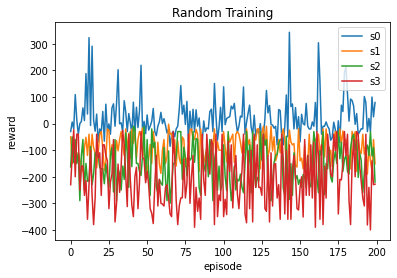

In [14]:
#Ploting Positions
plt.plot(errD_fake, label='eD_f')
plt.plot(errD_real, label='eD_r')
plt.plot(errG, label='eG')
plt.plot(reward, label='reward')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('episode')
plt.legend()
plt.title('Random Training')
#plt.savefig('ddpg_rpyt_posx_best.png')